1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. Loading data and take a general look

In [2]:
df = pd.read_excel('ds_salaries.xlsx',index_col=0)

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


There isnt any missing data

In [5]:
sum(df.duplicated())

42

There are 42 duplicates ,must be removed

3. Data Cleaning and Renaming

In [6]:
df.drop_duplicates(inplace= True)

In [7]:
sum(df.duplicated())

0

Duplicates had been removed

In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

It`s observed that there are some columns undesired for our analysis, we`ll remove them

In [9]:
df.drop(['salary','salary_currency'],axis=1,inplace =True)

In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

salary in usd column will renamed to be salary to be in easy readable way

In [11]:
df.rename({'salary_in_usd':'salary'},axis=1,inplace = True)

In [12]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [13]:
df['work_year'].value_counts()

2022    278
2021    215
2020     72
Name: work_year, dtype: int64

In [14]:
df['experience_level'].value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

we can change abbreviations to readable way

In [15]:
def ex_le(x):
    if x =='EN':
        return 'Entry'
    elif x=='MI':
        return 'Intermediate'
    elif x=='SE':
        return'Senior'
    else:
        return 'Expert'
        
df['experience_level']=df['experience_level'].apply(ex_le)


In [16]:
df['experience_level'].value_counts()

Senior          243
Intermediate    208
Entry            88
Expert           26
Name: experience_level, dtype: int64

In [17]:
df['employment_type'].value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

Most of our data have employment type as full time, only 19 record are other types , this sample cant be used to make a concolusion about those types of employments , so we will remove them.

In [18]:
df.shape

(565, 9)

In [19]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [20]:
df=df[df['employment_type']=='FT']

In [21]:
df.shape

(546, 9)

19 rows had been removed , All of our data will only be for full time employment type , so we will remove that column

In [22]:
df.drop('employment_type',axis=1, inplace =True)

In [23]:
df.columns

Index(['work_year', 'experience_level', 'job_title', 'salary',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [24]:
df.remote_ratio.value_counts()

100    335
0      120
50      91
Name: remote_ratio, dtype: int64

In [25]:
def remote(x):
    if x==0:
        return 'Non-remote'
    elif x==50:
        return 'Hafly_remote'
    else:
        return 'Totaly_remote'   
df.remote_ratio = df.remote_ratio.apply(remote)

In [26]:
df['remote_ratio'].value_counts()

Totaly_remote    335
Non-remote       120
Hafly_remote      91
Name: remote_ratio, dtype: int64

In [27]:
def comp(x):
    if x=='L':
        return "Large"
    elif x=='M':
        return 'Medium'
    else:
        return 'Small'
    
df['company_size']=df['company_size'].apply(comp)

In [28]:
df['company_size'].value_counts()

Medium    282
Large     188
Small      76
Name: company_size, dtype: int64

In [29]:
df.head()

,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,Intermediate,Data Scientist,79833,DE,Non-remote,DE,Large
1,2020,Senior,Machine Learning Scientist,260000,JP,Non-remote,JP,Small
2,2020,Senior,Big Data Engineer,109024,GB,Hafly_remote,GB,Medium
3,2020,Intermediate,Product Data Analyst,20000,HN,Non-remote,HN,Small
4,2020,Senior,Machine Learning Engineer,150000,US,Hafly_remote,US,Large


Now , our Data is ready for investigation

Q1: Which company size is most preferable for each experience level?

Let`s set visuals

In [30]:
sns.set_style('darkgrid')

<AxesSubplot:title={'center':'Average Salaries for experience level over company size'}, xlabel='experience_level,company_size', ylabel='Average Salaries in USD'>

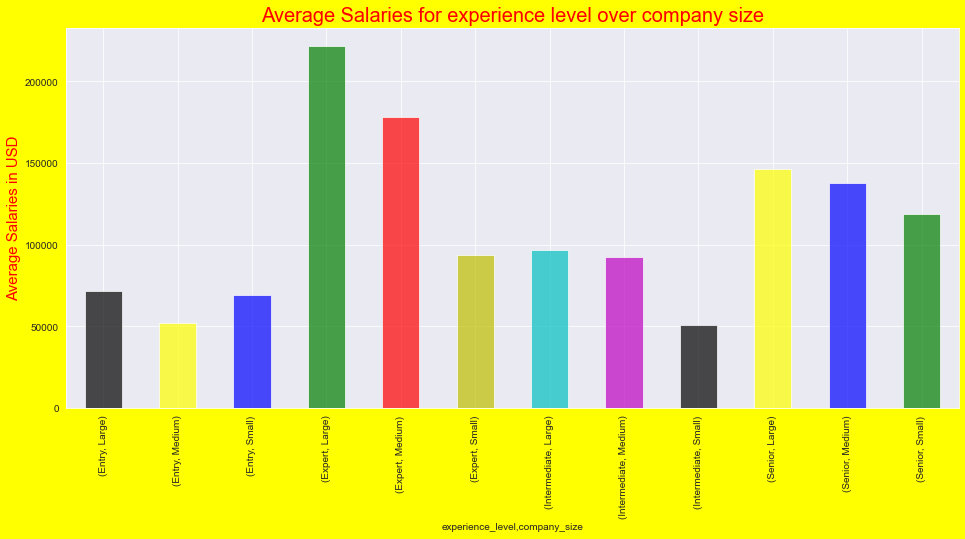

In [31]:
plt.figure(figsize=(16,7),edgecolor='black',facecolor='yellow')
plt.title('Average Salaries for experience level over company size',fontsize=20,color='r')
plt.ylabel('Average Salaries in USD',fontsize=15,color='r')
df.groupby(['experience_level','company_size'])['salary'].mean().plot(kind='bar',color=['k','yellow','b','g','r','y','c','m'],alpha=0.7)

-For Entry level , medium size companies give the minimum averages compared to other company sizes
-For Intermediate experience level,Small companies are the least salaries
-while for seniors and Experts , as company size increases salaries increases and vise versa. 

Q2: Which countries has the most vacancies for data scientisit?

In [32]:
df.groupby(['company_location'])['company_location'].count().sort_values(ascending=False).head(5)

company_location
US    309
GB     46
CA     28
DE     25
IN     23
Name: company_location, dtype: int64

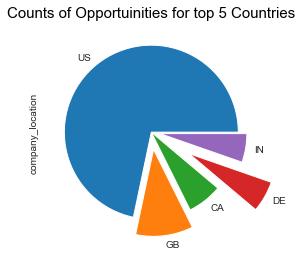

In [33]:
color=['k','yellow','b','g','r','y','c','m']
myexplode=[0,0.2,0,0.5,0.1]
plt.title('Counts of Opportuinities for top 5 Countries',fontsize=15,c='k')
df.groupby(['company_location'])['company_location'].count().sort_values(ascending=False).head(5).plot(kind='pie',explode=myexplode);

It`s obvious that USA have the most data science vacancies.

Q3: Which year has the highest average value of salaries?

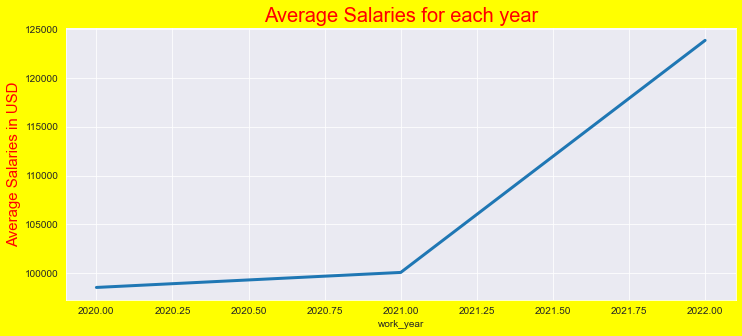

In [34]:
plt.figure(figsize=(12,5),edgecolor='black',facecolor='yellow')
plt.title('Average Salaries for each year',fontsize=20,color='r')
plt.ylabel('Average Salaries in USD',fontsize=15,color='r')
df.groupby(['work_year'])['salary'].mean().plot(kind='line',lw=3);


<AxesSubplot:title={'center':'Salaries Trend for experience levels'}, xlabel='work_year', ylabel='salary'>

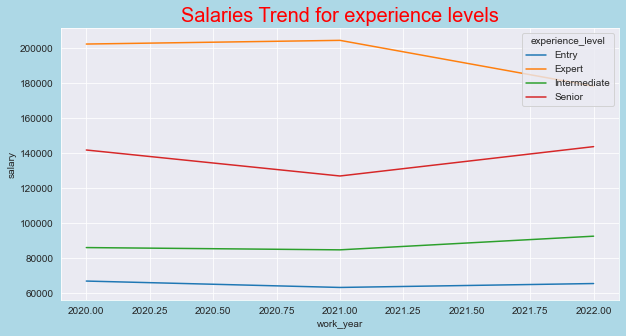

In [35]:
x=df.groupby(['work_year','experience_level'])['salary'].mean()
x=x.reset_index()
plt.figure(figsize=(10,5),edgecolor='black',facecolor='lightblue')
plt.title('Salaries Trend for experience levels',fontsize=20,color='r')
sns.lineplot(data=x,x='work_year',y='salary',hue='experience_level')

there was a significant decrease in average salaries for experts while other experience levels had a slightly increase in average salaries.

In [36]:
y=df.groupby(['experience_level','remote_ratio'])['salary'].mean()
y=y.reset_index()
y

,experience_level,remote_ratio,salary
0,Entry,Hafly_remote,63897.619048
1,Entry,Non-remote,57666.357143
2,Entry,Totaly_remote,66885.454545
3,Expert,Hafly_remote,143175.400000
4,Expert,Non-remote,158948.666667
5,Expert,Totaly_remote,210321.764706
6,Intermediate,Hafly_remote,80217.026316
7,Intermediate,Non-remote,84269.924528
8,Intermediate,Totaly_remote,92857.118182
9,Senior,Hafly_remote,95250.888889


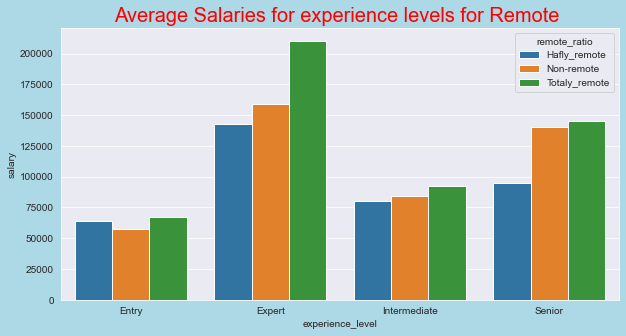

In [37]:
plt.figure(figsize=(10,5),edgecolor='black',facecolor='lightblue')
plt.title('Average Salaries for experience levels for Remote ',fontsize=20,color='r')
sns.barplot(data=y,x='experience_level',y='salary',hue='remote_ratio');

-Fully Remote jobs gives a relatively higher average rates.

In [38]:
df

,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,Intermediate,Data Scientist,79833,DE,Non-remote,DE,Large
1,2020,Senior,Machine Learning Scientist,260000,JP,Non-remote,JP,Small
2,2020,Senior,Big Data Engineer,109024,GB,Hafly_remote,GB,Medium
3,2020,Intermediate,Product Data Analyst,20000,HN,Non-remote,HN,Small
4,2020,Senior,Machine Learning Engineer,150000,US,Hafly_remote,US,Large
...,...,...,...,...,...,...,...,...
602,2022,Senior,Data Engineer,154000,US,Totaly_remote,US,Medium
603,2022,Senior,Data Engineer,126000,US,Totaly_remote,US,Medium
604,2022,Senior,Data Analyst,129000,US,Non-remote,US,Medium
605,2022,Senior,Data Analyst,150000,US,Totaly_remote,US,Medium


Q4: which country has the most people work with data? and which has a higher revenues?

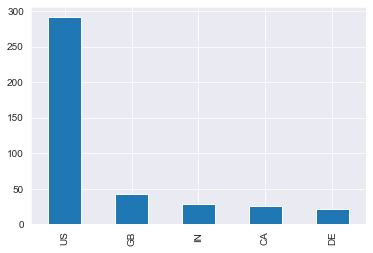

In [39]:
df['employee_residence'].value_counts().head().plot(kind='bar');

In [40]:
z=df.groupby(['employee_residence'])['salary'].sum().sort_values(ascending=False).head(6)
z=z.reset_index()

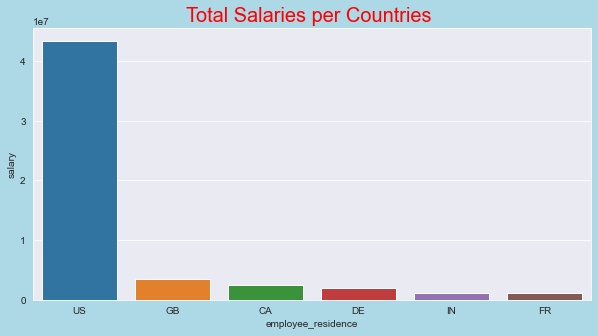

In [41]:
plt.figure(figsize=(10,5),edgecolor='black',facecolor='lightblue')
plt.title('Total Salaries per Countries ',fontsize=20,color='r')
sns.barplot(data=z,x='employee_residence',y='salary');

it`s clear that USA has the higher total salaries and higher count of employees.

Q5:which countries gives a higher salaries ? and also which employees has a higher revenues?

In [42]:
x=df.groupby(['employee_residence'])['salary'].mean()
x=x.reset_index()
x=x.sort_values('salary',ascending=False).head(5)

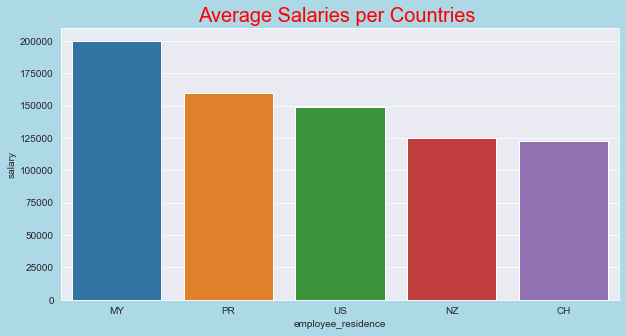

In [43]:
plt.figure(figsize=(10,5),edgecolor='black',facecolor='lightblue')
plt.title('Average Salaries per Countries ',fontsize=20,color='r')
sns.barplot(data=x,x='employee_residence',y='salary');

Malysia has a higher revenues in average

In [44]:
x=df.groupby(['company_location'])['salary'].mean()
x=x.reset_index()
x=x.sort_values('salary',ascending=False).head(5)

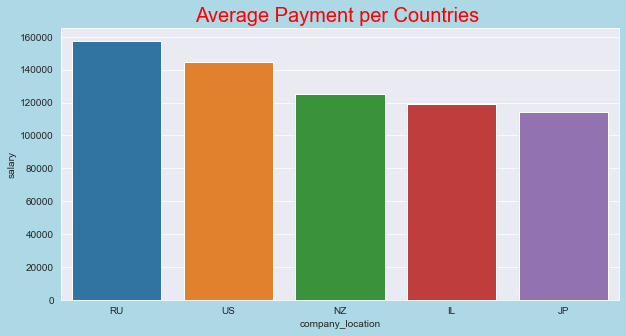

In [45]:
plt.figure(figsize=(10,5),edgecolor='black',facecolor='lightblue')
plt.title('Average Payment per Countries ',fontsize=20,color='r')
sns.barplot(data=x,x='company_location',y='salary');

-Russia then USA are the most higher countries that pay to people work with data

Concolusion:
    1.Most of Data vacancies are full time employments.
    2.-For Entry level,medium size companies give the minimum averages compared to other company sizes
    3 -For Intermediate experience level,Small companies are the least salaries 
    4- while for seniors and Experts , as company size increases salaries increases and vise versa.
    5-By the time from 2020 to 2022, Average salaries for data employees in entry and intermediate are slightly increases
    , seniors have higher increase in salaries while experts salries decreases.
    6-Totally remote jobs gives relatively higher salaries.
    7-USA have the most companies and most of data employees
    8- In average , Malysia ,France then USA have employees of higher revenues.
    9-Russia and USA are the most countries that pay for data.